## Homework for Deep Learning in Practice with Python and LUA (VITMAV45)

---



## Topic: Hyperparameter optimization methods


## Group: Deep learning boys

*   Molnár Marcell
*   Poleczki Ákos
*   Szerencsi László

---



# Imports & Datasets

In [2]:
import numpy as np # Of course we need Numpy
from sklearn.model_selection import train_test_split # For dataset seperation

from tensorflow.keras.utils import to_categorical # To convert labels

# Random seed
np.random.seed(12345)
import tensorflow 
tensorflow.random.set_seed(54321)

In [13]:
# Dataset names that can be loaded with the function below
dataset_names = ["MNIST", "FASHION_MNIST", "CIFAR100"]

# Function to load a chosen dataset
def load_data_set(data_set):
    if data_set == "MNIST":
        from tensorflow.keras.datasets import mnist
        # Load MNIST
        (X_train_validation, y_train_validation), (X_test, y_test) = mnist.load_data()
        # Reshape for grayscale 28x28 images
        X_train_validation = X_train_validation.reshape(-1,28,28,1)
        X_test = X_test.reshape(-1,28,28,1)
        # Specifying number of different labels
        nb_classes = 10
    if data_set == "FASHION_MNIST":
        from tensorflow.keras.datasets import fashion_mnist
        # Load Fashion MNIST
        (X_train_validation, y_train_validation), (X_test, y_test) = fashion_mnist.load_data()
        # Reshape for grayscale 28x28 images
        X_train_validation = X_train_validation.reshape(-1,28,28,1)
        X_test = X_test.reshape(-1,28,28,1)
        # Specifying number of different labels
        nb_classes = 10
    else: # Load "CIFAR100"
        from tensorflow.keras.datasets import cifar100
        # Load CIFAR100
        (X_train_validation, y_train_validation), (X_test, y_test) = cifar100.load_data(label_mode="fine")
        # Reshape for colored 32x32 images
        X_train_validation = X_train_validation.reshape(-1,32,32,3)
        X_test = X_test.reshape(-1,32,32,3)
        # Specifying number of different labels
        nb_classes = 100

    # Use data as float
    X_train_validation = X_train_validation.astype("float32")
    X_test = X_test.astype("float32")

    # Normalize data with min-max scaling (min=0, max=255)
    X_train_validation /= 255
    X_test /= 255

    # Convert labels into one-hot vectors
    y_train_validation = to_categorical(y_train_validation, nb_classes)
    y_test = to_categorical(y_test, nb_classes)

    # Split train data into train and validation data
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.2)

    # Retun with train, validation, test data and number of labels
    return (X_train, y_train), (X_validation, y_validation), (X_test, y_test), nb_classes


### Go

In [14]:
# Specify dataset index to be loaded
dataset_index_to_load = 2
# Get dataset name
dataset_name = dataset_names[dataset_index_to_load]

# Load training, validation and test dataset and number of labels
(X_train, y_train), (X_validation, y_validation), (X_test, y_test), nb_classes = load_data_set(dataset_name) # Load dataset

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_validation))
print(np.shape(y_validation))
print(np.shape(X_test))
print(np.shape(y_test))

(40000, 32, 32, 3)
(40000, 100)
(10000, 32, 32, 3)
(10000, 100)
(10000, 32, 32, 3)
(10000, 100)


### Visualization

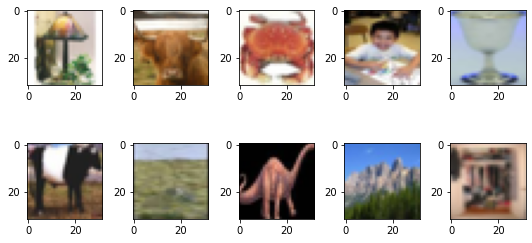

In [17]:
import matplotlib.pyplot as plt

num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    #ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()